In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

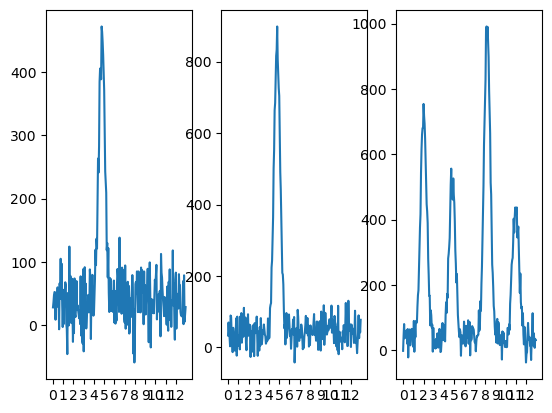

In [2]:
time = np.arange(0,13,0.05)
tr_drug = 4.8

fig, ax = plt.subplots(1, 3)

int = np.zeros_like(time)
int += 40
int += 32.*np.random.randn(np.size(time))
int += 50.*6.*norm.pdf(time, tr_drug,scale=0.3)
ax[0].plot(time,int)

int = np.zeros_like(time)
int += 40
int += 32.*np.random.randn(np.size(time))
int += 100.*6.*norm.pdf(time, tr_drug,scale=0.3)
ax[1].plot(time,int)

int = np.zeros_like(time)
int += 40
int += 32.*np.random.randn(np.size(time))
int += 60.*6.*norm.pdf(time, tr_drug,scale=0.3)

int += 520.*norm.pdf(time, 2.0,scale=0.3)
int += 720.*norm.pdf(time, 8.2,scale=0.3)
int += 300.*norm.pdf(time, 11.,scale=0.3)
ax[2].plot(time,int)

for i in range(3):
    ax[i].set_xticks(range(13))

plt.savefig('chrom.pdf')  

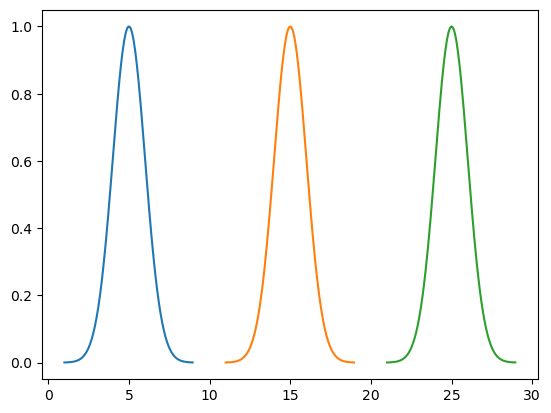

In [3]:
time = np.arange(0,30,0.05)
fig, ax = plt.subplots()

time = np.arange(1,9,0.05)
int = np.zeros_like(time)
int += norm.pdf(time, 5,scale=1.0)
int *= 1./int.max()
ax.plot(time,int)

time = np.arange(11,19,0.05)
int = np.zeros_like(time)
int += norm.pdf(time, 15,scale=1.0)
int *= 1./int.max()
ax.plot(time,int)

time = np.arange(21,29,0.05)
int = np.zeros_like(time)
int += norm.pdf(time, 25,scale=1.0)
int *= 1./int.max()
ax.plot(time,int)

plt.savefig('forwidths.pdf') 

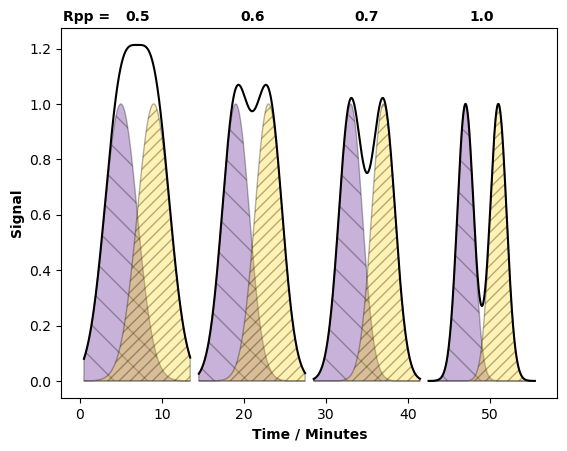

In [9]:
fig, ax = plt.subplots()

offset = 0.
t_A = 5
t_B = 9
Rpp = [0.5, 0.6, 0.7,1.0]

for i in range(4):
    
    s = 1/Rpp[i]
    
    time = np.arange(offset+0.5,offset+13.5,0.05)
    int_A = norm.pdf(time, offset+t_A,scale=s)
    int_A *= 1./int_A.max()
    int_B = norm.pdf(time, offset+t_B,scale=s)
    int_B *= 1./int_B.max()

    ax.fill_between(time,int_A,alpha=0.3,color='indigo',hatch='\\',edgecolor='black')
    ax.fill_between(time,int_B,alpha=0.3,color='gold',hatch='///',edgecolor='black')
    ax.plot(time, int_A+int_B,color="black")
    
    ax.text(offset+7, 1.3, str(Rpp[i]), fontweight='bold', horizontalalignment="center")
    
    
    offset += 14

ax.text(-2, 1.3, "Rpp = ", fontweight='bold')        
ax.set_xlabel('Time / Minutes', fontweight='bold')
ax.set_ylabel('Signal', fontweight='bold')

plt.savefig('rpp.png', transparent=False, dpi=300)

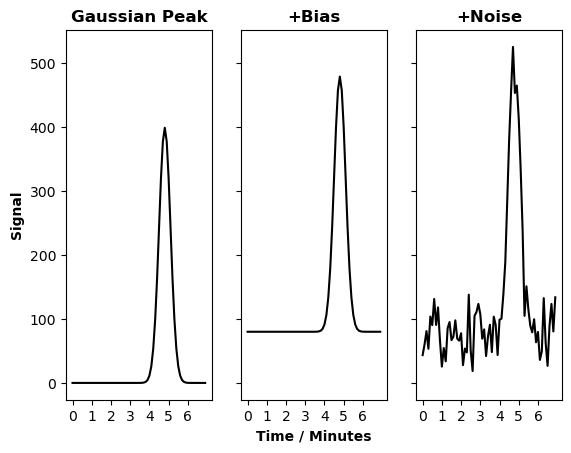

In [5]:
fig, ax = plt.subplots(1, 3,sharey=True)

time = np.arange(0,7,0.1)
tr_drug = 4.8
int = np.zeros_like(time)
int += 50.*6.*norm.pdf(time, tr_drug,scale=0.3)
ax[0].plot(time,int,color='black')

int += 80
ax[1].plot(time,int,color='black')

int += 32.*np.random.randn(np.size(time))
ax[2].plot(time,int,color='black')

for i in range(3):
    ax[i].set_xticks(range(7))

ax[0].set_ylabel('Signal', fontweight='bold')
ax[1].set_xlabel('Time / Minutes', fontweight='bold')

ax[0].set_title('Gaussian Peak', fontweight='bold')
ax[1].set_title('+Bias', fontweight='bold')
ax[2].set_title('+Noise', fontweight='bold')

plt.savefig('chromatogram-errors.png', transparent=False, dpi=300)

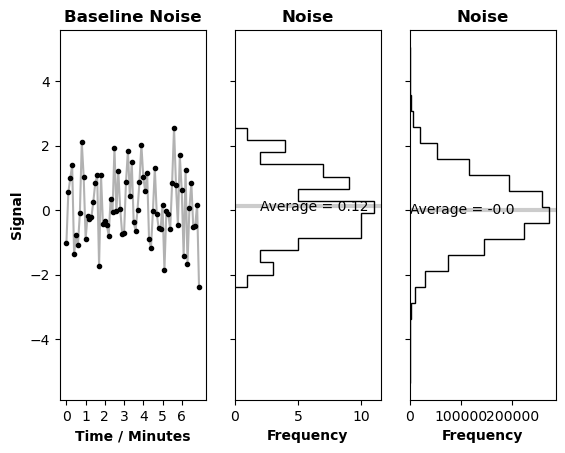

In [6]:
fig, ax = plt.subplots(1, 3,sharey=True)

time = np.arange(0,7,0.1)
int = np.zeros_like(time)
int += np.random.randn(np.size(time))
ax[0].plot(time,int,color='black',alpha=0.3)
ax[0].plot(time,int,'k.')
ax[0].set_xticks(range(7))

ax[1].hist(int,bins=13,orientation="horizontal",histtype='step',color='black')
ax[1].axhline(int.mean(),color='black',alpha=0.2,lw=3)
ax[1].text(2,
           int.mean(),
           'Average = '+str(np.round(int.mean(),2)),verticalalignment="center")


time = np.arange(0,7,0.000005)
int = np.zeros_like(time)
int += np.random.randn(np.size(time))
ax[2].hist(int,bins=21,orientation="horizontal",histtype='step',color='black')
ax[2].axhline(int.mean(),color='black',alpha=0.2,lw=3)
ax[2].text(2,
           int.mean(),
           'Average = '+str(np.round(int.mean(),2)),verticalalignment="center")

ax[0].set_ylabel('Signal', fontweight='bold')
ax[0].set_xlabel('Time / Minutes', fontweight='bold')
ax[1].set_xlabel('Frequency', fontweight='bold')
ax[2].set_xlabel('Frequency', fontweight='bold')

ax[0].set_title('Baseline Noise', fontweight='bold')
ax[1].set_title('Noise', fontweight='bold')
ax[2].set_title('Noise', fontweight='bold')

plt.savefig('chromatogram-noise.png', transparent=False, dpi=300)

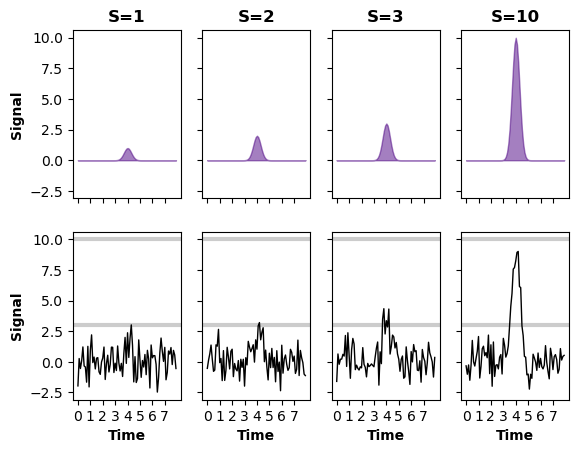

In [7]:
fig, ax = plt.subplots(2,4,sharex=True,sharey=True)

offset = 0.
tr = 4

time = np.arange(0,8,0.1)


heights = [1,2,3,10]

for i in range(4):
    
    int = np.zeros_like(time)
    int += np.random.randn(np.size(time))   
    peak = norm.pdf(time, tr,scale=0.3)
    peak *= heights[i]/peak.max()
    
    ax[0,i].fill_between(time,peak,alpha=0.5,color='indigo')    
    #ax[1,i].fill_between(time,peak,alpha=0.5,color='indigo')    
    ax[1,i].plot(time,int+peak,'k',lw=1)
    
    ax[0,i].set_title('S='+str(heights[i]), fontweight='bold')
    
    ax[0,i].set_xticks(range(8))
    ax[1,i].set_xticks(range(8))

    ax[1,i].set_xlabel('Time', fontweight='bold')
    
    ax[1,i].axhline(3,color='black',alpha=0.2,lw=3)    
    ax[1,i].axhline(10,color='black',alpha=0.2,lw=3)    
    
ax[0,0].set_ylabel('Signal', fontweight='bold')
ax[1,0].set_ylabel('Signal', fontweight='bold')


plt.savefig('chromatogram-lod-loq.png', transparent=False, dpi=300)